#  Recommendation System for Netflix Prize Dataset using SVD

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Combined_data_1 dataset is very huge, so i cannot submit the project with the dataset included, hence providing the link of the dataset to download it. Please download and upload the dataset into notebook instance if required
https://drive.google.com/drive/folders/14y64y6SWmA7_6I19ildMfwCveG8G9Prb


# To load the 'combined_data_1' dataset after uploading it to Jupyter notebook

In [3]:
# Reading dataset file
dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

# Convert Ratings column to a float
dataset['Rating'] = dataset['Rating'].astype(float)

In [4]:
#To print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [5]:
#To inspect the shape of the datset
dataset.shape



(1019226, 2)

In [6]:
#To print the head of dataset
dataset.head()

Cust_Id  Rating
0       1:     NaN
1  1488844     3.0
2   822109     5.0
3   885013     4.0
4    30878     4.0

In [7]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])

p

count
Rating        
1.0      45772
2.0      98630
3.0     283350
4.0     358185
5.0     233049

In [8]:
# get movie count by counting nan values

movie_count = dataset.isnull().sum()[1]

movie_count

<ipython-input-8-f99696189fdd>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie_count = dataset.isnull().sum()[1]


240

In [9]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count

cust_count

284795

In [10]:
# get rating count

rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

1018986

## To plot the distribution of the ratings in as a bar plot

<ipython-input-11-5fb390b03939>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')


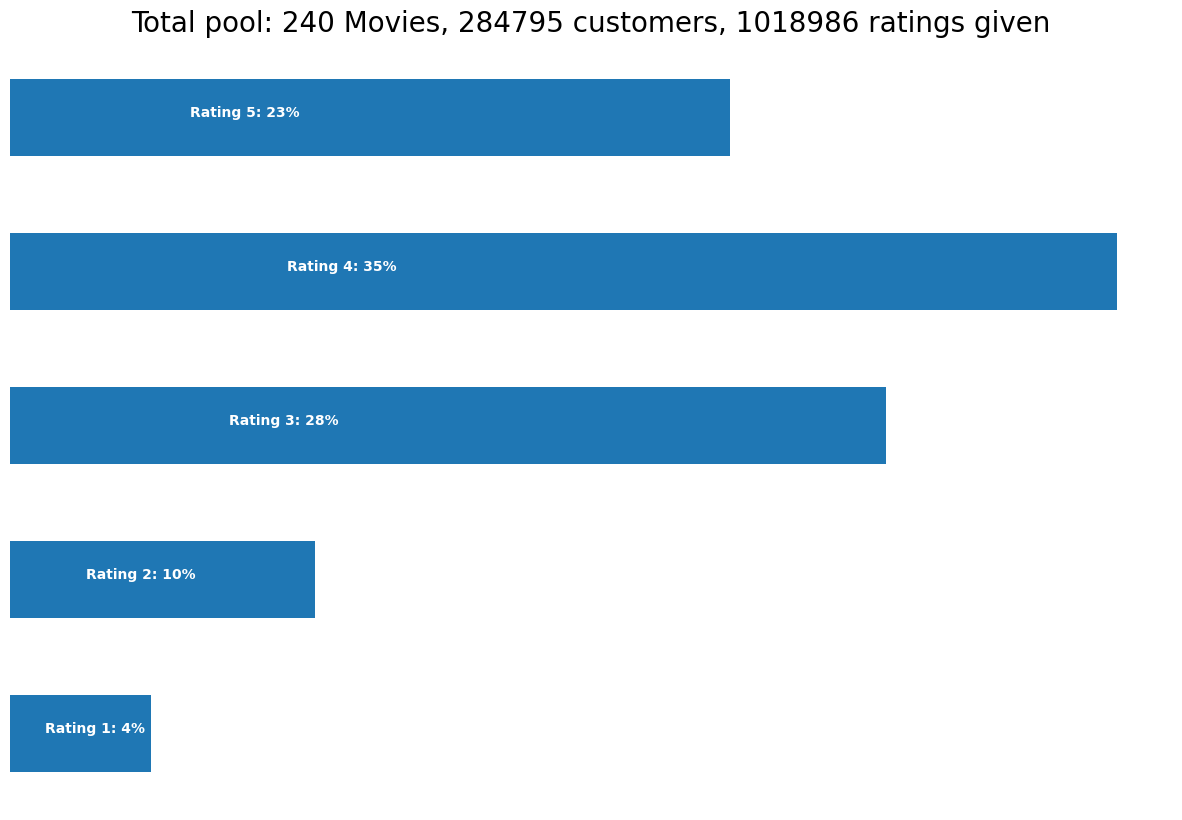

In [11]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

# To create a numpy array containing movie ids corresponding to the rows in the 'ratings' dataset

In [12]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating), )

df_nan.head()

Rating
0    True
1   False
2   False
3   False
4   False

In [13]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]


df_nan.shape

(240, 1)

In [14]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()



df_nan.head()

index  Rating
0      0    True
1    548    True
2    694    True
3   2707    True
4   2850    True

In [15]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [  1.   1.   1. ... 240. 240. 240.]
Length: 1018986


In [18]:
x =zip(df_nan['index'][1:],df_nan['index'][:-1])

In [19]:
temp = np.full((1,547), 1)

In [20]:
print(temp)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [21]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [22]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]

dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

<ipython-input-22-83f5a995ec51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Movie_Id'] = movie_np.astype(int)


-Dataset examples-


Cust_Id  Rating  Movie_Id
1  1488844     3.0         1
2   822109     5.0         1
3   885013     4.0         1
4    30878     4.0         1
5   823519     3.0         1

In [23]:
dataset.shape

(1018986, 3)

# Data Cleaning

In [24]:
f = ['count','mean']



In [25]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1365.0


In [26]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary.index = dataset_cust_summary.index.map(int)
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 4.0


In [27]:
print(f'Original Shape: {dataset.shape}')


Original Shape: (1018986, 3)


In [28]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (652650, 3)


In [29]:

print('-Data Examples-')
dataset.head()

-Data Examples-


Cust_Id  Rating  Movie_Id
696   712664     5.0         3
697  1331154     4.0         3
699    44937     5.0         3
700   656399     4.0         3
701   439011     1.0         3

# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [30]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(97364, 72)


In [31]:
df_p.head()

Movie_Id  3    8    16   17   18   26   28   30   32   33   ...  209  213  \
Cust_Id                                                     ...             
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  ...  NaN  NaN   
7         NaN  5.0  NaN  NaN  NaN  NaN  4.0  5.0  NaN  NaN  ...  NaN  NaN   
79        NaN  NaN  NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  ...  NaN  NaN   
87        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
134       NaN  NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  ...  NaN  NaN   

Movie_Id  215  216  223  225  232  238  239  240  
Cust_Id                                           
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
79        NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  
87        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
134       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 72 columns]

### To load the movie_titles dataset

In [34]:
df_title = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


# To install the scikit-surprise library for implementing SVD

### Run the following command in the Anaconda Prompt to install surprise package

In [37]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357286 sha256=f2b8a622663fbae88776a189795205724da2dff87279a69e7fedab511b798373
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [38]:
# Import required libraries
import math
import re
import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [39]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0024  0.9901  1.0009  0.9978  0.0055  
MAE (testset)     0.8013  0.7880  0.8065  0.7986  0.0078  
Fit time          4.43    3.33    1.57    3.11    1.17    
Test time         0.76    0.36    0.30    0.48    0.20    


{'test_rmse': array([1.00240816, 0.99014381, 1.00087119]),
 'test_mae': array([0.80133276, 0.78799789, 0.80645958]),
 'fit_time': (4.42561149597168, 3.3263325691223145, 1.5749859809875488),
 'test_time': (0.7602787017822266, 0.3641369342803955, 0.30214691162109375)}

In [40]:
dataset.head()

Cust_Id  Rating  Movie_Id
696   712664     5.0         3
697  1331154     4.0         3
699    44937     5.0         3
700   656399     4.0         3
701   439011     1.0         3

# Q1-A) List of Top Most Popular Movies

In [47]:
# Assuming you have a DataFrame 'df_title' containing 'Movie_Id' and 'Name' of the movies

# Count the number of ratings for each movie
movie_ratings_count = dataset.groupby('Movie_Id')['Rating'].count().reset_index()

# Rename the 'Rating' column to something more descriptive
movie_ratings_count.rename(columns={'Rating': 'Rating_Count'}, inplace=True)

# Sort the movies by the number of ratings in descending order
most_popular_movies = movie_ratings_count.sort_values(by='Rating_Count', ascending=False)

# Merge with the movie titles DataFrame to get the names
most_popular_movies = most_popular_movies.merge(df_title, on='Movie_Id')

# Display the top 10 most popular movies with their Movie_Id, Name, and Rating_Count
print(most_popular_movies[['Movie_Id', 'Name', 'Rating_Count']].head(10))


   Movie_Id                    Name  Rating_Count
0        30  Something's Gotta Give         61110
1       191        X2: X-Men United         60745
2       175          Reservoir Dogs         53211
3       197            Taking Lives         45918
4       143                The Game         31261
5        28         Lilo and Stitch         27852
6       199         The Deer Hunter         26588
7       111     Duplex (Widescreen)         21046
8       148          Sweet November         17429
9       187        Death to Smoochy         16487


# Q1-B) List of Top Most Liked Movies

In [48]:
# Assuming you have a DataFrame 'df_title' containing 'Movie_Id' and 'Name' of the movies

# Calculate the average rating for each movie
movie_ratings_avg = dataset.groupby('Movie_Id')['Rating'].mean().reset_index()

# Rename the 'Rating' column to something more descriptive
movie_ratings_avg.rename(columns={'Rating': 'Average_Rating'}, inplace=True)

# Sort the movies by the average rating in descending order
most_liked_movies = movie_ratings_avg.sort_values(by='Average_Rating', ascending=False)

# Merge with the movie titles DataFrame to get the names
most_liked_movies = most_liked_movies.merge(df_title, on='Movie_Id')

# Display the top 10 most liked movies with their Movie_Id, Name, and Average_Rating
print(most_liked_movies[['Movie_Id', 'Name', 'Average_Rating']].head(10))


   Movie_Id                                               Name  Average_Rating
0       223                         Chappelle's Show: Season 1        4.216460
1        33                     Aqua Teen Hunger Force: Vol. 1        4.135382
2        68                                        Invader Zim        4.116524
3       209               Star Trek: Deep Space Nine: Season 5        4.109983
4        32  ABC Primetime: Mel Gibson's The Passion of the...        4.061224
5        76                              I Love Lucy: Season 2        4.041360
6       215                           That '70s Show: Season 1        4.037848
7       167                                         The Chorus        4.010973
8       175                                     Reservoir Dogs        3.985229
9       240                                  Woman of the Year        3.947601


# Q2 ) Model to find the best suited movie for user

In [55]:
# Create a shallow copy for the movies dataset
user_1000 = df_title.copy()

user_1000 = user_1000.reset_index()

#To remove all the movies rated less often
user_1000 = user_1000[~user_1000['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_1000
user_1000['Estimate_Score'] = user_1000['Movie_Id'].apply(lambda x: svd.predict(1000, x).est)

#Drop extra columns from the user_1000 data frame
user_1000 = user_1000.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_1000 in descending order
user_1000 = user_1000.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_1000.head(10))

       Year                                               Name  Estimate_Score
32   2000.0                     Aqua Teen Hunger Force: Vol. 1        4.313392
67   2004.0                                        Invader Zim        4.288345
222  2003.0                         Chappelle's Show: Season 1        4.265398
174  1992.0                                     Reservoir Dogs        4.229469
208  1996.0               Star Trek: Deep Space Nine: Season 5        4.146018
214  1998.0                           That '70s Show: Season 1        4.105248
31   2004.0  ABC Primetime: Mel Gibson's The Passion of the...        4.047030
166  2004.0                                         The Chorus        4.041512
164  1982.0            Richard Pryor: Live on the Sunset Strip        4.029318
75   1952.0                              I Love Lucy: Season 2        3.972663


In [56]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

       Year                                               Name  Estimate_Score
222  2003.0                         Chappelle's Show: Season 1        4.378801
174  1992.0                                     Reservoir Dogs        4.306661
166  2004.0                                         The Chorus        4.214962
70   1995.0                    Maya Lin: A Strong Clear Vision        4.212548
31   2004.0  ABC Primetime: Mel Gibson's The Passion of the...        4.194341
43   1996.0                                     Spitfire Grill        4.162858
78   1956.0                                        The Killing        4.158059
67   2004.0                                        Invader Zim        4.154782
32   2000.0                     Aqua Teen Hunger Force: Vol. 1        4.144703
179  2002.0                                            Scratch        4.125239


# Q3) List of Top Best Rated and Top Worst rated Movies

In [52]:
# Calculate the average rating for each movie
movie_ratings_avg = dataset.groupby('Movie_Id')['Rating'].mean().reset_index()

# Rename the 'Rating' column to something more descriptive
movie_ratings_avg.rename(columns={'Rating': 'Average_Rating'}, inplace=True)

# Merge with the movie titles DataFrame to get the names
movies_with_ratings = movie_ratings_avg.merge(df_title, on='Movie_Id')

# Sort the movies by average rating in descending order to find the best rated
best_rated_movies = movies_with_ratings.sort_values(by='Average_Rating', ascending=False)

# Sort the movies by average rating in ascending order to find the worst rated
worst_rated_movies = movies_with_ratings.sort_values(by='Average_Rating', ascending=True)

# Display the top 10 best rated movies
print("Best Rated Movies:")
print(best_rated_movies[['Movie_Id', 'Name', 'Average_Rating']].head(10))

# Display the top 10 worst rated movies
print("\nWorst Rated Movies:")
print(worst_rated_movies[['Movie_Id', 'Name', 'Average_Rating']].head(10))


Best Rated Movies:
    Movie_Id                                               Name  \
66       223                         Chappelle's Show: Season 1   
9         33                     Aqua Teen Hunger Force: Vol. 1   
20        68                                        Invader Zim   
62       209               Star Trek: Deep Space Nine: Season 5   
8         32  ABC Primetime: Mel Gibson's The Passion of the...   
22        76                              I Love Lucy: Season 2   
64       215                           That '70s Show: Season 1   
46       167                                         The Chorus   
49       175                                     Reservoir Dogs   
71       240                                  Woman of the Year   

    Average_Rating  
66        4.216460  
9         4.135382  
20        4.116524  
62        4.109983  
8         4.061224  
22        4.041360  
64        4.037848  
46        4.010973  
49        3.985229  
71        3.947601  

Worst Rated

#Results From Capstone Project Datasets


In [58]:
df = pd.read_csv('CapstoneDataSet.csv')

In [60]:
df.head(10)

Cust_Id  Rating  Movie_Id   Genre        MovieName
0  1488844       3         1  Action  Dinosaur Planet
1   822109       5         1  Action  Dinosaur Planet
2   885013       4         1  Action  Dinosaur Planet
3    30878       4         1  Action  Dinosaur Planet
4   823519       3         1  Action  Dinosaur Planet
5   893988       3         1  Action  Dinosaur Planet
6   124105       4         1  Action  Dinosaur Planet
7  1248029       3         1  Action  Dinosaur Planet
8  1842128       4         1  Action  Dinosaur Planet
9  2238063       3         1  Action  Dinosaur Planet

#Q1. Find out the list of most popular and liked genre

In [59]:
# Calculate the number of ratings and the average rating for each genre
genre_popularity = df.groupby('Genre')['Rating'].agg(['count', 'mean']).reset_index()

# Rename columns for better understanding
genre_popularity.rename(columns={'count': 'Rating_Count', 'mean': 'Average_Rating'}, inplace=True)

# Sort genres by popularity (number of ratings)
most_popular_genres = genre_popularity.sort_values(by='Rating_Count', ascending=False)

# Sort genres by average rating to find the most liked genres
most_liked_genres = genre_popularity.sort_values(by='Average_Rating', ascending=False)

# Display the most popular and most liked genres
print("Most Popular Genres:\n", most_popular_genres.head(10))
print("\nMost Liked Genres:\n", most_liked_genres.head(10))


Most Popular Genres:
           Genre  Rating_Count  Average_Rating
11   Historical        240327        3.817948
1     Animation        123898        3.581107
7   Educational        111976        3.898523
13      Mystery        100898        3.390731
4         Crime         97323        3.728872
2     Biography         88510        3.463439
10         Gang         54861        3.680611
19          War         43446        3.288243
15       RomCom         39629        3.383633
5   Documentary         38282        3.311661

Most Liked Genres:
           Genre  Rating_Count  Average_Rating
12       Horror         31271        4.123181
7   Educational        111976        3.898523
11   Historical        240327        3.817948
0        Action           547        3.749543
4         Crime         97323        3.728872
10         Gang         54861        3.680611
1     Animation        123898        3.581107
3        Comedy           145        3.558621
14        Other         25436        

# Q2. Create Model that finds the best suited Movie for one user in every genre

In [64]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
import pandas as pd

# Function to recommend the best movie for a user in each genre and return as a DataFrame
def recommend_best_movies_for_user(user_id, df):
    reader = Reader(rating_scale=(1, 5))
    recommendations = []

    for genre in df['Genre'].unique():
        df_genre = df[df['Genre'] == genre]

        # Check if there are enough ratings to perform a split
        n_ratings = len(df_genre)
        if n_ratings < 5:  # Skip genres with very few ratings
            print(f"Skipping genre '{genre}' due to insufficient ratings.")
            continue

        data = Dataset.load_from_df(df_genre[['Cust_Id', 'Movie_Id', 'Rating']], reader)

        # Adjust the test_size if needed
        test_size = 0.2 if n_ratings > 10 else 0.1

        try:
            trainset, testset = train_test_split(data, test_size=test_size, random_state=42)
        except ValueError as e:
            print(f"Skipping genre '{genre}' due to split error: {e}")
            continue

        algo = SVD()
        algo.fit(trainset)

        movie_ids = df_genre['Movie_Id'].unique()
        user_movie_ids = df_genre[df_genre['Cust_Id'] == user_id]['Movie_Id'].unique()
        unrated_movie_ids = [movie for movie in movie_ids if movie not in user_movie_ids]

        predictions = [algo.predict(user_id, movie_id) for movie_id in unrated_movie_ids]
        if not predictions:  # If there are no predictions available
            print(f"No predictions available for genre '{genre}'.")
            continue

        best_prediction = max(predictions, key=lambda x: x.est)
        best_movie_name = df[df['Movie_Id'] == best_prediction.iid]['MovieName'].values[0]

        # Append the genre, movie name, and predicted rating to the recommendations list
        recommendations.append([genre, best_movie_name, best_prediction.est])

    # Convert the recommendations list into a DataFrame
    recommendations_df = pd.DataFrame(recommendations, columns=['Genre', 'Best Movie', 'Predicted Rating'])

    return recommendations_df

# Example usage for user with ID 1
user_id = 1
recommendations_df = recommend_best_movies_for_user(user_id, df)

# Display the recommendations as a table
recommendations_df


Skipping genre 'nan' due to insufficient ratings.


Genre                                         Best Movie  \
0        Action                                    Dinosaur Planet   
1        Comedy                         Isle of Man TT 2004 Review   
2        Horror                                 North by NorthWest   
3       Romance                       Paula Abdul's Get Up & Dance   
4      Thriller  Lord of the Rings: The Return of the King: Ext...   
5       Fiction                                               Sick   
6     Animation               Star Trek: Deep Space Nine: Season 5   
7          Gang                       Star Trek: Voyager: Season 1   
8         Other                                         Elfen Lied   
9       Mystery                     Bruce Lee: A Warrior's Journey   
10        Drama      Inspector Morse 31: Death Is Now My Neighbour   
11        Crime                                           The Game   
12       Sci-Fi                              I Love Lucy: Season 2   
13    Biography                           That '70s Show: Season 1   
14          War                             WWE: Royal Rumble 2005   
15   Historical                                     Reservoir Dogs   
16  Documentary  Stevie Ray Vaughan and Double Trouble: Live at...   
17  Educational                  GTO: Great Teacher Onizuka: Set 2   
18       RomCom                     Aqua Teen Hunger Force: Vol. 1   
19          Fan            Richard Pryor: Live on the Sunset Strip   

    Predicted Rating  
0           3.748578  
1           3.639792  
2           4.067260  
3           2.774056  
4           4.487663  
5           3.094554  
6           4.205278  
7           3.980348  
8           4.256870  
9           3.953103  
10          3.988793  
11          3.988939  
12          4.072498  
13          4.047610  
14          3.900779  
15          4.078010  
16          4.108167  
17          4.164753  
18          4.199476  
19          3.932119

#Q3. Find what Genre Movies have received the best and worst ratings based on User Rating

In [65]:
# Calculate the average rating for each genre
genre_ratings = df.groupby('Genre')['Rating'].mean().reset_index()

# Sort genres by average rating to find the best and worst-rated genres
best_rated_genres = genre_ratings.sort_values(by='Rating', ascending=False)

# Display the genres with the best and worst ratings
print("Best Rated Genres:\n", best_rated_genres.head(10))
print("\nWorst Rated Genres:\n", best_rated_genres.tail(10))


Best Rated Genres:
           Genre    Rating
12       Horror  4.123181
7   Educational  3.898523
11   Historical  3.817948
0        Action  3.749543
4         Crime  3.728872
10         Gang  3.680611
1     Animation  3.581107
3        Comedy  3.558621
14        Other  3.551541
6         Drama  3.496365

Worst Rated Genres:
           Genre    Rating
17       Sci-Fi  3.477920
8           Fan  3.465356
2     Biography  3.463439
13      Mystery  3.390731
15       RomCom  3.383633
5   Documentary  3.311661
19          War  3.288243
9       Fiction  3.084396
18     Thriller  3.073112
16      Romance  2.739437
